# Plotting Symbols From The Combined Dataframe

This notebook demonstrates how to plot some stock ticker data from the saved dataframe created with `create_dataframe.py`.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import os


### 1. Load the Combined Data

In [13]:
pklfile = 'dataframe.pkl'

combined_df = pd.read_pickle(pklfile)

# Sort by Symbol, Date
combined_df.sort_values(by=['Symbol', 'Date'], inplace=True)
combined_df.reset_index(drop=True, inplace=True)

print("DataFrame loaded. Head:")
display(combined_df.head(10))

DataFrame loaded. Head:


,Date,Open,High,Low,Close,Volume,Symbol,MA_5,MA_10,MA_30,MA_90
0,2018-01-02,0.498214,0.589285,0.498214,0.581785,44800,AACG,0.581785,0.581785,0.581785,0.581785
1,2018-01-03,0.571071,0.572143,0.551785,0.572143,3000,AACG,0.576964,0.576964,0.576964,0.576964
2,2018-01-04,0.559285,0.583928,0.559285,0.578571,11100,AACG,0.577500,0.577500,0.577500,0.577500
3,2018-01-05,0.577500,0.612857,0.558214,0.578571,17400,AACG,0.577768,0.577768,0.577768,0.577768
4,2018-01-08,0.588214,0.589285,0.564643,0.564643,2600,AACG,0.575143,0.575143,0.575143,0.575143
5,2018-01-09,0.567857,0.571071,0.567857,0.570000,2500,AACG,0.572785,0.574285,0.574285,0.574285
6,2018-01-10,0.559285,0.590357,0.559285,0.568928,1800,AACG,0.572143,0.573520,0.573520,0.573520
7,2018-01-11,0.577500,0.588214,0.551785,0.551785,3400,AACG,0.566785,0.570803,0.570803,0.570803
8,2018-01-12,0.562500,0.589285,0.562500,0.588214,6300,AACG,0.568714,0.572738,0.572738,0.572738
9,2018-01-16,0.594643,0.605357,0.594643,0.602143,17000,AACG,0.576214,0.575678,0.575678,0.575678


### 2. Select 10 Symbols and Plot Their Close Prices
We:
- Identify **unique symbols** in the DataFrame.
- Randomly select up to 10 of them.
- Plot the `Close` price over `Date` for each selected symbol.

_If your dataset has fewer than 10 symbols, we'll just pick all of them._

Chosen symbols: ['PAGP', 'BSCP', 'UBSI', 'NTRA', 'CERS', 'MNSB', 'SISI', 'XRAY', 'HOPE', 'IMOS']


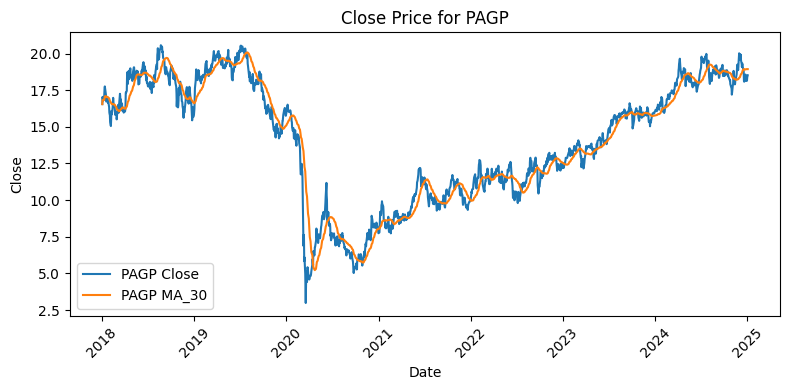

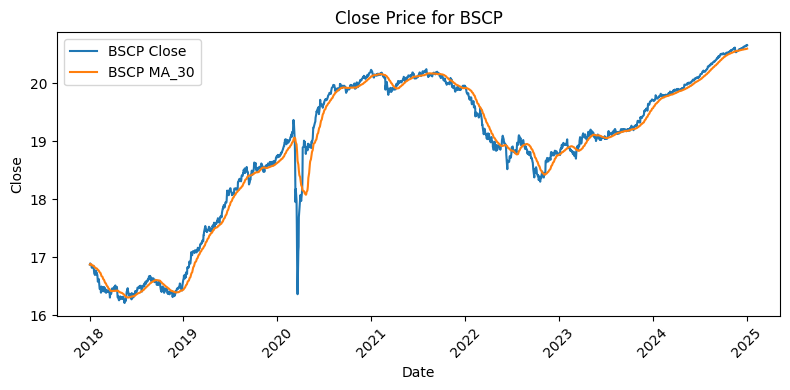

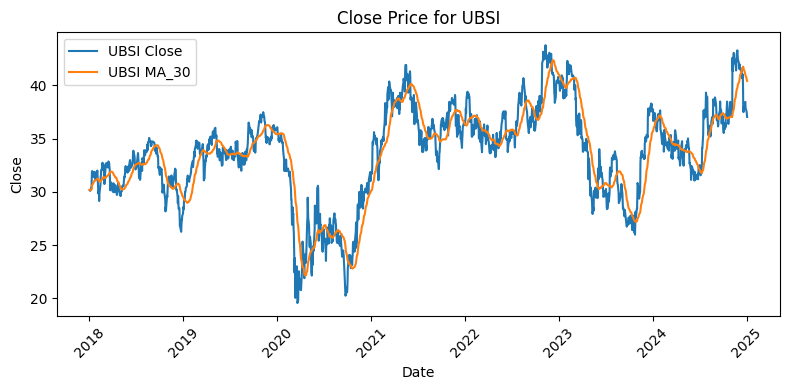

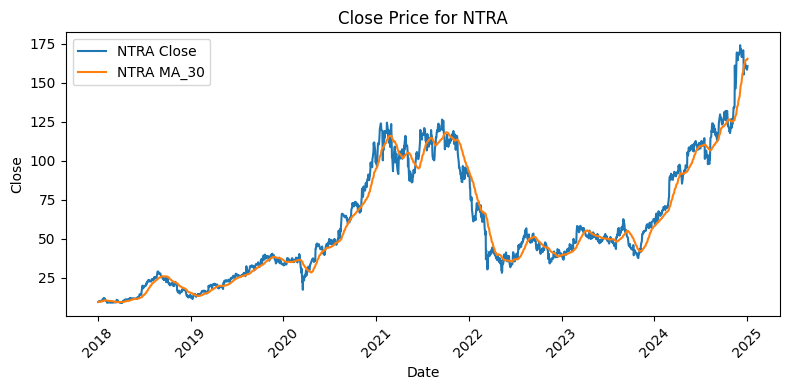

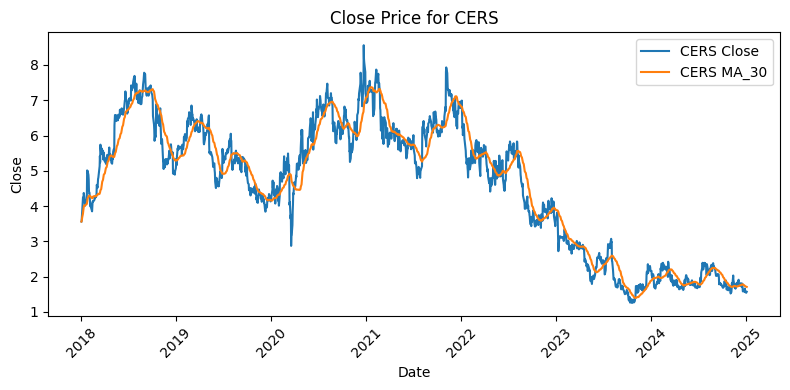

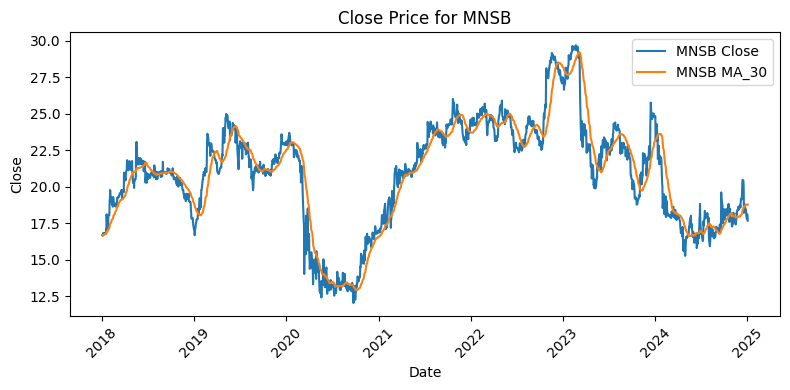

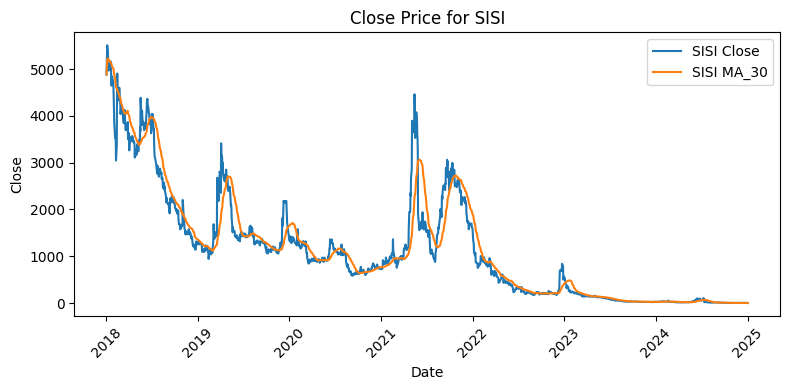

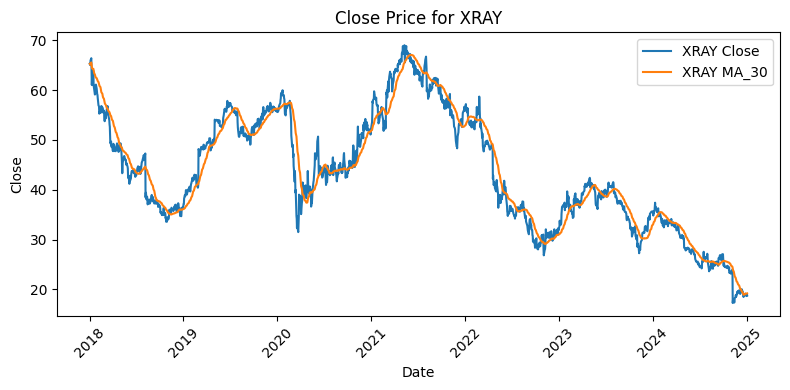

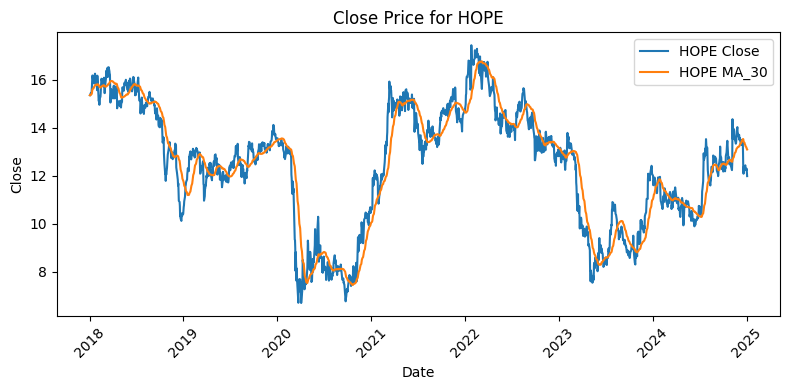

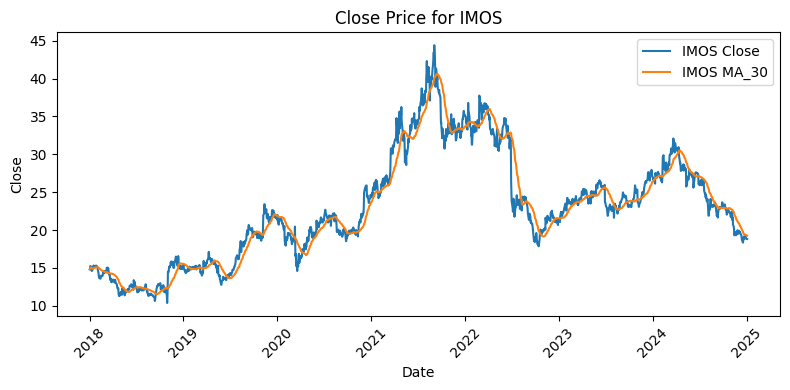

In [14]:
# Identify unique symbols
unique_symbols = combined_df['Symbol'].unique()

# If there are more than 10 symbols, randomly choose 10
if len(unique_symbols) > 10:
    chosen_symbols = random.sample(list(unique_symbols), 10)
else:
    chosen_symbols = unique_symbols

print("Chosen symbols:", chosen_symbols)

# Plot each symbol's close price
for symbol in chosen_symbols:
    sym_data = combined_df[combined_df['Symbol'] == symbol].copy()
    # Sort by Date just in case
    sym_data.sort_values('Date', inplace=True)

    plt.figure(figsize=(8,4))
    plt.plot(sym_data['Date'], sym_data['Close'], label=f"{symbol} Close")
    plt.plot(sym_data['Date'], sym_data['MA_30'], label=f"{symbol} MA_30")
    plt.title(f"Close Price for {symbol}")
    plt.xlabel("Date")
    plt.ylabel("Close")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()